* Complete the definition of each functional module of logistic regression: model function, gradient rise, training, prediction, etc.
* Define function functions on demand
* Complete model training and prediction on a sample


* Sklearn source code can provide you with certain reference and help
    * https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [5]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

In [6]:
# Specify the training data path

file = '../resource/dataset.txt'

In [7]:

# load data (Two features)
def loadDataSet(filename):
    dataMat = []
    labelMat = []
    data = open(filename)
    for line in data.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

# sigmoid func
def sigmoid(x):
    return 1.0/(1+exp(-x))

# Gradient ascent function definition, input is a list of features and labels, and output model parameters

# Gradient ascent for optimal parameters
def gradAscent(dataMat, labelMat):
    # Convert the read data into a matrix
    dataMatrix = mat(dataMat) 
    # Convert the read data label to a matrix
    classLabels = mat(labelMat).transpose()
    m,n = shape(dataMatrix)
    # Learning rate, the greater the value, the greater the gradient rise
    alpha = 0.01
    # Number of iterations
    maxCycles = 500
    # Parameter initialization
    weights = ones((n,1))

    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (classLabels - h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

# Drawing function
def plotBestFit(weights, dataMat, labelMat):
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# Define the main function and realize the process of generating training data -> model training -> visual classification effect
def main():
    dataMat, labelMat = loadDataSet(file)
    weights = gradAscent(dataMat, labelMat).getA()
    plotBestFit(weights, dataMat, labelMat)

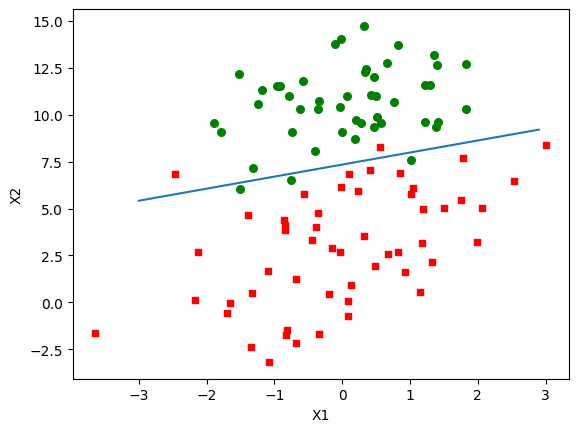

In [8]:
main()

# The second 


In [10]:
from numpy import *
import matplotlib.pyplot as plt

# Specify the training data path
file = '../resource/dataset.txt'

# load data (Two features)
def loadDataSet(filename):
    """
    Traverse data by row
    Construct a feature list -> [[1, x11, x12], [1, x21, x22],...[1, xn1, xn2]]
    Construct a list of tags -> [0, 1, 1, 0, 1...1]
    Return feature list and tag list
    """
    with open(filename, 'r') as f:
        data = f.readlines()
        data = [d.strip('\n').split('\t') for d in data]
        dataMat = [[1, float(dd[0]), float(dd[1])] for dd in data]
        labelMat = [[float(dd[2])] for dd in data] # The shape after mat is (m, 1)

    return dataMat, labelMat

# sigmoid func
def sigmoid(x):
    s = 1.0 / (1.0 + exp(-x))
    return s

# Gradient ascent function definition, input is a list of features and labels, and output model parameters
def gradAscent(dataMat, labelMat, alpha, iteration):
    loss = []
    # Convert the read data into a matrix (m, n)
    dataMatrix = mat(dataMat)
    # (m,1)
    classLabels = mat(labelMat)
    # Number of samples, number of features +1
    m, n = shape(dataMatrix)
    # Define learning rate and number of iterations
    alpha = alpha
    iteration = iteration
    # Initialize the model parameters, pay attention to the shape of the parameters
    weights = ones((n, 1)) # Parameter initialization ((m,n)x(n,1))

    
    # Model training
    for k in range(iteration):
        # predict
        h_ = sigmoid(dataMatrix * weights) # (m,n)x(n,1)=(m,1)
        h = mat([float(hh) for hh in h_]).T

        # Gradient rise
        weights = weights + alpha * dataMatrix.T * (classLabels - h)

        loss_ = sum(sqrt(multiply(classLabels - h, classLabels - h))) / m
        loss.append(loss_)
    # Return parameters
    # print(f"iter {k+1}, the loss is {loss}")
    return weights, loss, iteration, alpha


# drawing plot
def plotBestFit(weights, iteration, alpha, dataMat, labelMat):
    dataArr = array(dataMat) # (m,n)
    n = shape(dataArr)[0] # Number of samples
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []

    for i in range(n):
        # Sample category is 1
        if int(labelMat[i][0]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])

    fig = plt.figure(figsize = (5, 5))
    ax = fig.add_subplot(111)
    area = pi * (10 * 0.5) **2
    # Draw the first type of sample points
    ax.scatter(xcord1, ycord1, s = area, c = 'red', alpha = 0.6)
    # Draw the second type of sample points, distinguish them with different colors and shapes
    ax.scatter(xcord2, ycord2, s = area, c = 'b', alpha = 0.6, marker = 'v')

    x = arange(-3.0, 3.0, 0.1).tolist()
    print(arange(-3.0, 3.0,  0.1).shape)

    # (x2 = -(w1x+b)/w2)
    y = ((-weights[0] - weights[1] * x) / weights[2]).tolist()
    ax.plot(x, y[0])

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'iteration = {iteration} alpha = {alpha}')
    plt.show()



In [8]:
# Define the main function to realize the process of generating training data -> model training -> visual classification effect
def main():
    dataMat, labelMat = loadDataSet(filename)
    weights1, loss1, iteration1, alpha1 = gradAscent(dataMat, labelMat, alpha = 0.02, iteration = 1000)
    weights2, loss2, iteration2, alpha2 = gradAscent(dataMat, labelMat, alpha = 0.01, iteration = 1000)
    weights3, loss3, iteration3, alpha3 = gradAscent(dataMat, labelMat, alpha = 0.001, iteration = 1000)
    weights4, loss4, iteration4, alpha4 = gradAscent(dataMat, labelMat, alpha = 0.0001, iteration = 1000)

    # Loss function graph
    fig2 = plt.figure(figsize = (5, 5))
    ax = fig2.add_subplot(111)
    ax.plot(range(iteration1), loss1, c = 'aqua', label = f'alpha={alpha1}', alpha=0.7)
    ax.plot(range(iteration2), loss2, c = 'r', label = f'alpha={alpha2}', alpha=0.5)
    ax.plot(range(iteration3), loss3, c = 'b', label = f'alpha={alpha3}')
    ax.plot(range(iteration4), loss4, c = 'g', label = f'alpha={alpha4}')

    ax.legend()
    plt.xlabel('iteration')
    plt.ylabel('loss')

    # Classification result graph
    plotBestFit(weights1, iteration1, alpha1, dataMat, labelMat)
    plotBestFit(weights2, iteration2, alpha2, dataMat, labelMat)
    plotBestFit(weights3, iteration3, alpha3, dataMat, labelMat)
    plotBestFit(weights4, iteration4, alpha4, dataMat, labelMat)

(60,)


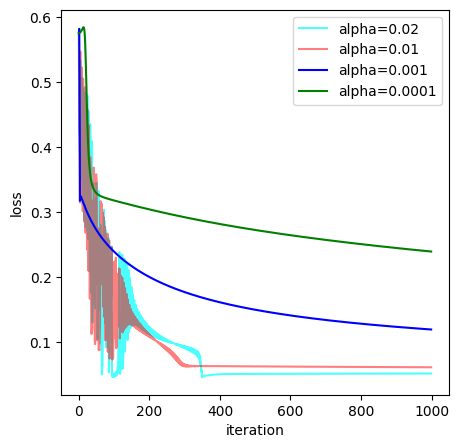

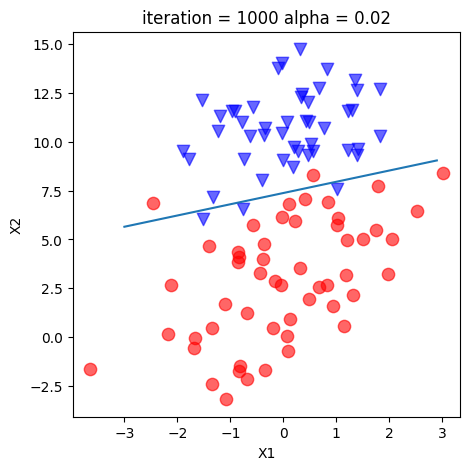

(60,)


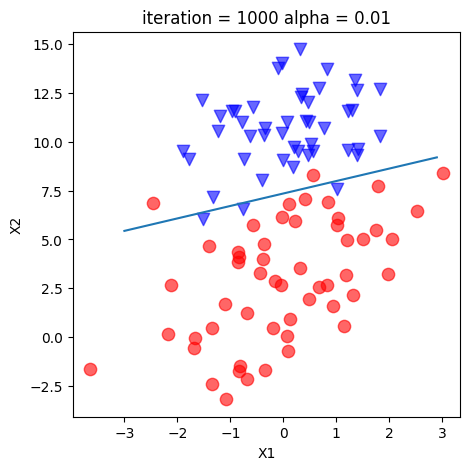

(60,)


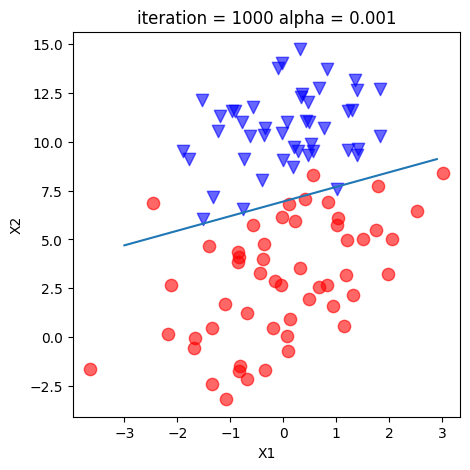

(60,)


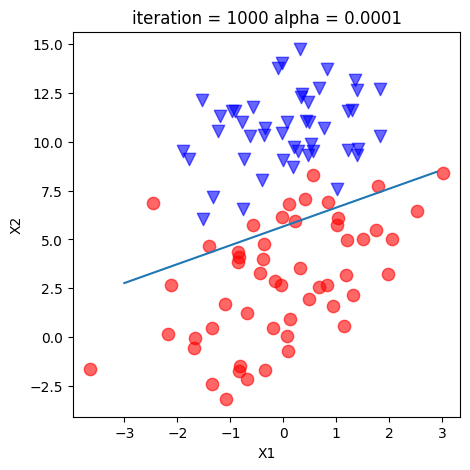

In [9]:
main()